<div align="center" style="display: flex; justify-content: space-between;">
  <div style="flex: 1; padding: 10px;">
    <a href="https://github.com/encord-team/text-to-image-eval/actions?query=workflow%3ATests" target="_blank" style="text-decoration:none"><img src="https://github.com/encord-team/text-to-image-eval/actions/workflows/tests.yml/badge.svg?branch=main"></a>
    <a href="https://www.python.org/downloads/release/python-3119/" target="_blank" style="text-decoration:none"><img src="https://img.shields.io/badge/python-3.11%2B-blue" alt="Python Versions"></a>
    <a target="_blank" style="text-decoration:none"><img alt="PRs Welcome" src="https://img.shields.io/badge/PRs-Welcome-blue"></a>
    <img alt="License" src="https://img.shields.io/github/license/encord-team/text-to-image-eval">
  </div>
  <div style="flex: 1; padding: 10px;">
    <a href="https://github.com/encord-team/encord-notebooks" target="_blank" style="text-decoration:none"><img alt="Encord Notebooks" src="https://img.shields.io/badge/Encord_Notebooks-blue?logo=github&label=&labelColor=181717"></a>
    <a href="https://join.slack.com/t/encordactive/shared_invite/zt-1hc2vqur9-Fzj1EEAHoqu91sZ0CX0A7Q" target="_blank" style="text-decoration:none"><img alt="Join us on Slack" src="https://img.shields.io/badge/Join_Our_Community-4A154B?label=&logo=slack&logoColor=white"></a>
    <a href="https://twitter.com/encord_team" target="_blank" style="text-decoration:none"><img alt="Twitter Follow" src="https://img.shields.io/twitter/follow/encord_team?label=%40encord_team&amp;style=social"></a>
  </div>
</div>

<h1 align="center">
    <img src="https://storage.googleapis.com/docs-media.encord.com/static/img/text-to-image-eval/tti-eval-banner-short.png" alt="tti-eval logo banner">
</h1>

# 📝 tti-eval | 🐍 Python Quickstart

Welcome to the *Python quickstart* guide for the `tti-eval` tool. This notebook covers the basic usage of the Python programmatic approach providing a quick way to test `tti-eval` without installing anything locally.

In this notebook, you will explore:
- Understanding embedding definitions and how to instantiate them.
- Building embeddings.
- Evaluating models.
- 📊 Generating 2D animations of the embeddings.


## Overview

`tti-eval` is a repository for benchmarking text-to-image models **on your own data**!

With this library, you can take an embedding model intended for jointly embedding images and text (like [CLIP](https://huggingface.co/openai/clip-vit-large-patch14-336)) and compute metrics for how well such model performs on classifying your custom dataset.

🟡 Prior to continuing, ensure that Colab's runtime type is set to `T4 GPU` instead of `CPU`. You can find this option under 'Runtime > Change runtime type > Hardware accelerator'. Additionally, note that the notebook may restart the runtime the first time you run it after installing Python 3.11. This restart is necessary as switching Python versions in Colab requires a runtime restart.

> Learn more about 📝 `tti-eval`:
> - [🖥️ CLI Quickstart](https://colab.research.google.com/drive/1SsKre_9vQ9SAIQyPFQmbUBXRKzoZv8AH?usp=sharing)
> - [🤖 Bring Your Own Model From Hugging Face Quickstart](https://colab.research.google.com/drive/1ZuhBJ5QtH3MKuO-Y5QiiEKoz4BU1Un-8?usp=sharing)
> - [🗄️ Bring Your Own Dataset From Encord Quickstart](https://colab.research.google.com/drive/1qESU9zx1cBnK3vUDpOeuH6uZjt-f5Cb6?usp=sharing)
> - [GitHub repository](https://github.com/encord-team/text-to-image-eval)

## Set up the repo and dependencies

In [1]:
#@title 1. Install and set up Python 3.11 {display-mode: "form"}
# Credits to JanEricNitschke in https://github.com/pnxenopoulos/awpy/issues/248#issuecomment-1575170156

#The code below installs 3.11 (assuming you now have 3.10) and restarts environment, so you can run your cells.
import sys #for version checker
import os #for restart routine

if '3.11' in sys.version:
  print('You already have 3.11, nothing to install')
elif '3.10' in sys.version:
  print("Python version is: ", sys.version)

  print("Printing content of /usr/local/lib/python* to see available versions")
  !ls /usr/local/lib/python*

  #install python 3.11 and dev utils
  #you may not need all the dev libraries, but I haven't tested which aren't necessary.
  !sudo apt-get update -y > /dev/null
  !sudo apt-get install python3.11 python3.11-dev python3.11-distutils libpython3.11-dev > /dev/null
  !sudo apt-get install python3.11-venv binfmt-support  > /dev/null #recommended in install logs of the command above

  #change alternatives
  !sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.10 1 > /dev/null
  !sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.11 2 > /dev/null

  # install pip
  !curl -sS https://bootstrap.pypa.io/get-pip.py | python3.11  > /dev/null

  #install colab's dependencies
  !python3 -m pip install ipython==7.9.0 traitlets==5.7.1 jupyter psutil matplotlib setuptools ipython_genutils ipykernel jupyter_console notebook prompt_toolkit httplib2 astor  > /dev/null

  #minor cleanup
  !sudo apt autoremove > /dev/null

  #link to the old google package
  !ln -s /usr/local/lib/python3.10/dist-packages/google /usr/local/lib/python3.11/dist-packages/google > /dev/null

  #this is just to verify if 3.11 folder was indeed created
  print("Printing content of /usr/local/lib/python3.11/")
  !ls /usr/local/lib/python3.11/

  #restart environment so you don't have to do it manually
  os.kill(os.getpid(), 9)
else:
  print("Your out of the box Python is not 3.10, so probably the script will not work, so pls feel free to edit the script to ignore then check and re-run: ", sys.version)

You already have 3.11, nothing to install


In [2]:
#@title 2. Clone the repo
!git clone https://github.com/encord-team/text-to-image-eval.git

Cloning into 'text-to-image-eval'...
remote: Enumerating objects: 852, done.
remote: Counting objects: 100% (434/434), done.
remote: Compressing objects: 100% (239/239), done.
remote: Total 852 (delta 300), reused 261 (delta 194), pack-reused 418
Receiving objects: 100% (852/852), 2.01 MiB | 25.14 MiB/s, done.
Resolving deltas: 100% (455/455), done.


In [ ]:
#@title 3. Install repo dependencies
%cd /content/text-to-image-eval/
!pip install poetry
!poetry config virtualenvs.in-project true # Configure Poetry to create virtual environments in the project folder
!poetry add ipykernel # Resolve Colab specific missing dependency
!poetry install --no-ansi

sys.path.insert(0, '/content/text-to-image-eval/.venv/lib/python3.11/site-packages')

## Python Usage

### 1. Embedding Definitions


Embedding definitions serve as the foundation of the programmatic approach, specifying the target model and dataset, and governing the location of embeddings in the filesystem. They enable various functionalities such as generating embeddings, conducting evaluations, creating animations, and more.

To instantiate an embedding definition, provide the title of the model and dataset.

In [4]:
from tti_eval.common import EmbeddingDefinition, Split

def1 = EmbeddingDefinition(model="clip", dataset="Alzheimer-MRI")

You can use the `tti_eval.common.EmbeddingDefinition.embedding_path()` method to locate the embeddings in the filesystem.
Each dataset split has its own file for embeddings, hence the `split` parameter is necessary to fetch the appropiate path.

In [5]:
def1.embedding_path(Split.TRAIN)

PosixPath('/content/text-to-image-eval/.cache/embeddings/Alzheimer-MRI/clip_train.npz')

### 2. Embedding Generation

To build embeddings, utilize the `tti_eval.compute.compute_embeddings_from_definition()` method.
Ensure to specify the dataset split for which you want to build the embeddings.


In [6]:
from tti_eval.compute import compute_embeddings_from_definition

embeddings = compute_embeddings_from_definition(def1, Split.TRAIN)

/content/text-to-image-eval/.venv/lib/python3.11/site-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.76k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.71G [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/844 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

Generating train split:   0%|          | 0/5120 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1280 [00:00<?, ? examples/s]

Embedding (train) Alzheimer-MRI dataset with clip: 100%|██████████| 88/88 [09:41<00:00,  6.61s/it]


Use `tti_eval.common.EmbeddingDefinition.save_embeddings()` to store the embeddings on the filesystem.

In [7]:
def1.save_embeddings(embeddings=embeddings, split=Split.TRAIN)

True

In [8]:
#@markdown A complete example computing and storing the validation embeddings for the embedding definition
val_embs = compute_embeddings_from_definition(def1, Split.VALIDATION)
def1.save_embeddings(embeddings=val_embs, split=Split.VALIDATION)

Embedding (validation) Alzheimer-MRI dataset with clip: 100%|██████████| 16/16 [01:41<00:00,  6.32s/it]


True

### 3. Model Evaluation



To evaluate models, employ the `tt_eval.evaluation.evaluator.run_evaluation()` method, and specify the embedding definitions containing the details of the target models and datasets.
Additionally, provide evaluation functions such as `I2IRetrievalEvaluator` and `ZeroShotClassifier` from `tti_eval.evaluation`.
These evaluators will operate on the train and validation embeddings specified in the embedding definitions.


In [9]:
#@markdown Let's start computing the required embeddings for a second definition, so we can compare the evaluation results against another model.
splits = [Split.TRAIN, Split.VALIDATION]
def2 = EmbeddingDefinition(model="bioclip", dataset="Alzheimer-MRI")
for split in splits:
  embeddings = compute_embeddings_from_definition(def2, split)
  def2.save_embeddings(embeddings=embeddings, split=split, overwrite=True)

open_clip_pytorch_model.bin:   0%|          | 0.00/599M [00:00<?, ?B/s]

open_clip_config.json:   0%|          | 0.00/469 [00:00<?, ?B/s]

open_clip_config.json:   0%|          | 0.00/469 [00:00<?, ?B/s]

Embedding (train) Alzheimer-MRI dataset with bioclip: 100%|██████████| 88/88 [00:49<00:00,  1.79it/s]
Embedding (validation) Alzheimer-MRI dataset with bioclip: 100%|██████████| 16/16 [00:08<00:00,  1.95it/s]


In [10]:
from tti_eval.evaluation import I2IRetrievalEvaluator, LinearProbeClassifier, WeightedKNNClassifier, ZeroShotClassifier
from tti_eval.evaluation.evaluator import run_evaluation

evaluators = [ZeroShotClassifier, LinearProbeClassifier, WeightedKNNClassifier, I2IRetrievalEvaluator]
performances = run_evaluation(evaluators, [def1, def2])

Evaluating models:   0%|          | 0/2 [00:00<?, ?it/s]

===== zero_shot =====
-------------  -------------
Model/Dataset  Alzheimer-MRI
bioclip        0.3086
clip           0.4870
-------------  -------------
===== linear_probe =====
-------------  -------------
Model/Dataset  Alzheimer-MRI
bioclip        0.6094
clip           0.5391
-------------  -------------
===== wKNN =====
-------------  -------------
Model/Dataset  Alzheimer-MRI
bioclip        0.9232
clip           0.7357
-------------  -------------
===== I2IR =====
-------------  -------------
Model/Dataset  Alzheimer-MRI
bioclip        0.4349
clip           0.4108
-------------  -------------


### 4. Embeddings Animation


To create 2D animations of the embeddings, use the `tti_eval.plotting.animation.build_animation()` method, and specify the embedding definitions containing the details of two models and a dataset.
Optionally, adjust the `reduction` parameter to specify the dimension reduction technique. By default, it will correspond to UMAP, while TSNE and PCA are also available.
This function generates an animation illustrating the corresponding reduction of embeddings from the two models on the same dataset.

To interactively explore the animation, set the `interactive` parameter to `True`, and call `matplotlib.pyplot.show()` afterwards.

🟡 Colab doesn't handle interactive output well, so the `interactive` parameter and matplotlib animations may not work effectively in that environment.

In [ ]:
from tti_eval.plotting.animation import build_animation, save_animation_to_file

anim = build_animation(def1, def2)

You can store the animations using the `tti_eval.plotting.animation.save_animation_to_file()` method.
The animations will be saved at the location specified by the environment variable `TTI_EVAL_OUTPUT_PATH`.
By default, this path corresponds to the `output/animations` folder in the repository directory.

In [19]:
save_animation_to_file(anim, def1, def2)

Animation stored at `/content/text-to-image-eval/output/animations/transition_Alzheimer-MRI_clip_bioclip_validation_20240510-095051.gif`


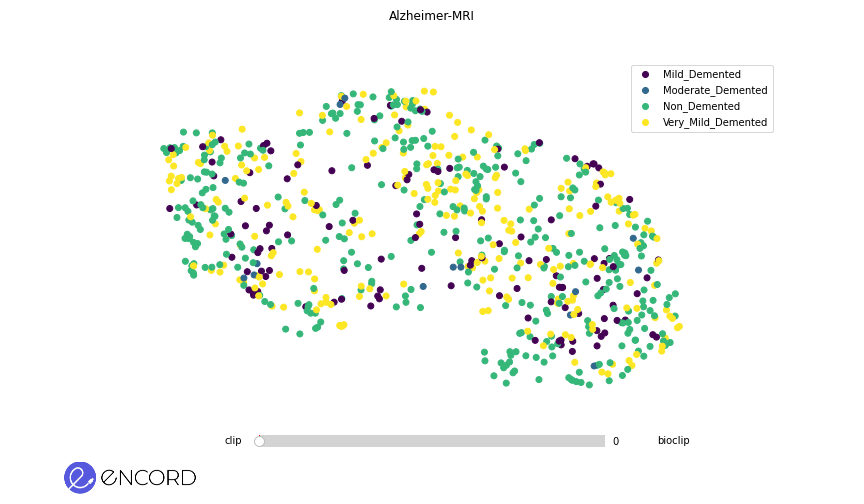

In [20]:
#@markdown Display the animation
from pathlib import Path
from IPython.display import Image

# Automatic search of the file
# You can get the path of the animation from the previous cell's output
animation_file = next(Path('output/animations').glob("transition_Alzheimer-MRI_clip_bioclip_*.gif")).as_posix()
#animation_file = '/content/text-to-image-eval/output/animations/transition_Alzheimer-MRI_clip_bioclip_validation_20240508-122954.gif'
Image(open(animation_file,'rb').read())

## Wrap Up

This notebook has provided an introduction to the Python programmatic approach of `tti-eval`, demonstrating how to instantiate embedding definitions and utilize them for tasks such as building embeddings, evaluating models and generating 2D animations of the embeddings.

---

🟣 `tti-eval` is an open-source repository for benchmarking text-to-image models **on your own data**!
**Check out the project on [GitHub](https://github.com/encord-team/text-to-image-eval) and leave a star 🌟** if you like it.
Contributions are welcome!
Please feel free to open an issue or submit a pull request with your suggestions, bug fixes, or new features.

---

👉 Check out the 📖 [Encord Blog](https://encord.com/blog/) and 📺 [YouTube](https://www.youtube.com/@encord) channel to stay up-to-date with the latest in computer vision, foundation models, active learning, and data-centric AI.


## Next: Learn the how to bring your own model from Hugging Face to `tti-eval`

What's next? 👀 Dive into how to bring a model from Hugging Face to `tti-eval`. In the Colab notebook, you will explore:
- How to find the required information of the target model on the Hugging Face website.
- Generating and registering the new model definition.
- ⭐ Start using your model right away.

[NEXT NOTEBOOK](https://colab.research.google.com/drive/1ZuhBJ5QtH3MKuO-Y5QiiEKoz4BU1Un-8?usp=sharing) ➡️